In [2]:
#import libraries
import os
import random as rd
import tensorflow as tf
import matplotlib.pyplot as plt
import pyBigWig as pbg
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import matplotlib as mpl
import keras.backend as K

In [3]:
def mae(y_true,y_pred):
    return np.asarray(K.mean(K.abs(y_true - y_pred))).round(3)

def mse(y_true,y_pred):
    return np.asarray(np.mean((y_true - y_pred)**2)).round(3)

In [80]:
dicX = {}
with np.load('/home/florian/projet/W303/seq.npz') as f:
    for i in ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16"]:
        dicX['{}'.format(i)]=f['chr{}'.format(i)]
        
dicY = {}
with np.load('/home/florian/clipped99_MNase.npz') as f:
    for i in ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16"]:
        dicY['{}'.format(i)]=f['chr{}'.format(i)]

In [81]:
df = pd.read_csv ('/home/florian/projet/models_yeast/test/history.csv')
dicPreds={}
with np.load('/home/florian/projet/models_yeast/preds_test.npz') as f:
    for i in ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16"]:
        dicPreds['{}'.format(i)]=f[i]
dicCorr={}
for i in ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16"]:
    if len(dicY[i])/10 == len(dicY[i])//10:
        dicCorr['{}'.format(i)]=round(np.corrcoef(dicY[i][::10],dicPreds[i])[0][1],3)
    else:
        dicCorr['{}'.format(i)]=round(np.corrcoef(dicY[i][1::10],dicPreds[i])[0][1],3)

dicMSE={}
for i in ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16"]:
    if len(dicY[i])/10 == len(dicY[i])//10:
        dicCorr['{}'.format(i)]=mse(dicY[i][::10],dicPreds[i])
    else:
        dicCorr['{}'.format(i)]=mse(dicY[i][1::10],dicPreds[i])


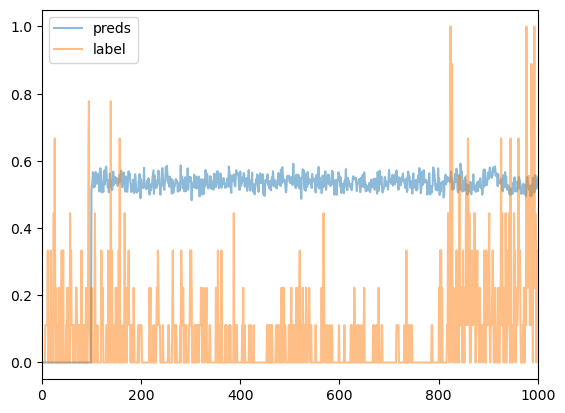

In [84]:
plt.plot(dicPreds['12'],alpha=0.5,label='preds')
plt.plot(dicY['12'][::10],alpha=0.5,label='label')
plt.xlim(0,1000)
plt.legend()

In [72]:
dicPreds["01"]==dicPreds["02"]

/tmp/ipykernel_1057960/1509680627.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  dicPreds["01"]==dicPreds["02"]


False